# Car prices
## About Dataset
### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

### Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Data Dictionnary

Car_ID:		Unique id of each observation (Interger)		<br>
Symboling: 			Its assigned insurance risk rating, A value of +3 indicates <br>
that the auto is risky, -3 that it is probably pretty safe.(Categorical) 	<br>
carCompany:			Name of car company (Categorical)	<br>
fueltype:			Car fuel type i.e gas or diesel (Categorical)	<br>
aspiration:			Aspiration used in a car (Categorical) <br>
doornumber:			Number of doors in a car (Categorical)	<br>
carbody:			body of car (Categorical)	<br>
drivewheel:			type of drive wheel (Categorical)	<br>
enginelocation:			Location of car engine (Categorical)	<br>
wheelbase:			Weelbase of car (Numeric)		<br>
carlength:			Length of car (Numeric)	<br>
carwidth:			Width of car (Numeric)	<br>
carheight:			height of car (Numeric)		<br>
curbweight:			The weight of a car without occupants or baggage. (Numeric) <br>
enginetype:			Type of engine. (Categorical)	<br>
cylindernumber:			cylinder placed in the car (Categorical)	<br>
enginesize:			Size of car (Numeric)	<br>
fuelsystem:			Fuel system of car (Categorical) <br>
boreratio:		Boreratio of car (Numeric)		<br>
stroke:			Stroke or volume inside the engine (Numeric)	<br>
compressionratio:			compression ratio of car (Numeric)	<br>
horsepower:			Horsepower (Numeric)	<br>
peakrpm:			car peak rpm (Numeric)	<br>
citympg:		Mileage in city (Numeric)	<br>
highwaympg:			Mileage on highway (Numeric)<br>
price(Dependent variable):			Price of car (Numeric)<br>

<p><strong>Dataset URL : <a href="https://archive.ics.uci.edu/ml/datasets/Automobile">Car prices dataset</a></strong></p>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cars_data=pd.read_csv('CarPrice_Assignment.csv')
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
print("dataset shape: ",cars_data.shape)
print("dataset features list: ",cars_data.columns)
print("\n")
print(cars_data.info())

dataset shape:  (205, 26)
dataset features list:  Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivew

## DATA PREPROCESSING
### Features preprocessing
<p>Car_ID is the same as index so we could drop it</p>

In [ ]:
cars_data=cars_data.drop(columns=["car_ID"],axis=1)
len(cars_data.columns)

25

In [ ]:
# now we want to show uniques values for each catgorical column
cat_cols=cars_data.select_dtypes(include='object').columns
for col in cat_cols:
  print(col,":",cars_data[col].unique())
  print(col," shape", cars_data[col].unique().shape)
  print("----------------------------\n")


CarName : ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick o

<p> We see that there are a lot of car Names so we won't be able to convert them. Moreover we can't see really how the car price could really depend on it's Name instead of it's performance</p>


In [ ]:
#checking duplicates
potent_dub=cars_data.drop(columns=["CarName","price"],axis=1)
potent_dub[potent_dub.duplicated(keep=False)].sort_values(by=potent_dub.columns.tolist())
#I want to drop duplicates from potent_dub which are in cars_data(I mean in car_data without the 2 two previously dropped columns )
cars_data.drop_duplicates(subset=potent_dub.columns.tolist(),inplace=True)


In [ ]:
cars_data.shape

(196, 25)

### Checking possible outliers

percentage of prices outliers:
  3.5714285714285716
percentage of stroke outliers:
  46.42857142857143
percentage of compressionratio outliers:
  10.714285714285714


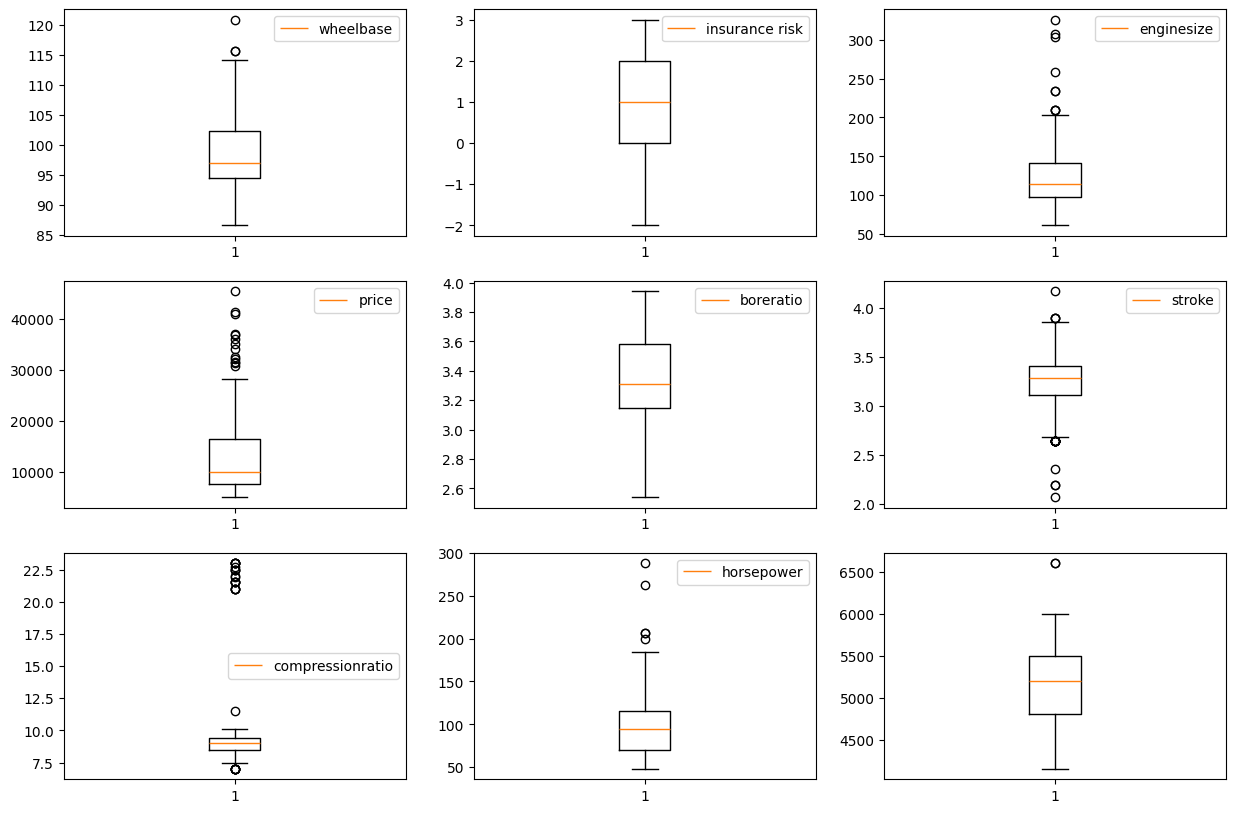

In [ ]:
#remove outliers
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
plt.boxplot(cars_data['wheelbase'],label='wheelbase')
plt.legend()
plt.subplot(3,3,2)
plt.boxplot(cars_data['symboling'],label='insurance risk')
plt.legend()
plt.subplot(3,3,3)

plt.boxplot(cars_data['enginesize'],label="enginesize")
plt.legend()
plt.subplot(3,3,4)
print("percentage of prices outliers:\n ",cars_data.loc[(cars_data['price']>35000),'price'].shape[0] *100/cars_data.shape[0])
plt.boxplot(cars_data['price'],label="price")
plt.legend()
plt.subplot(3,3,5)
plt.boxplot(cars_data['boreratio'],label="boreratio")
plt.legend()
plt.subplot(3,3,6)
plt.boxplot(cars_data['stroke'],label="stroke")
plt.legend()
#percentage of stroke outliers
print("percentage of stroke outliers:\n ",
      cars_data.loc[
          ((cars_data['stroke']>np.quantile(cars_data['stroke'],[0.75][0]))
          |(cars_data['stroke']<np.quantile(cars_data['stroke'],[0.25][0]))),
          'stroke'].shape[0]*100/cars_data.shape[0])
plt.subplot(3,3,7)
plt.boxplot(cars_data['compressionratio'],label="compressionratio")
plt.legend()
#percentage of compressionratio outliers
print("percentage of compressionratio outliers:\n ",cars_data.loc[(cars_data['compressionratio']>10) | (cars_data['compressionratio']<5) ,'compressionratio'].shape[0]*100/cars_data.shape[0])
plt.subplot(3,3,8)
plt.boxplot(cars_data['horsepower'],label="horsepower")
plt.legend()
plt.subplot(3,3,9)
plt.boxplot(cars_data['peakrpm'],label="peakrpm")
plt.show()

<Axes: >

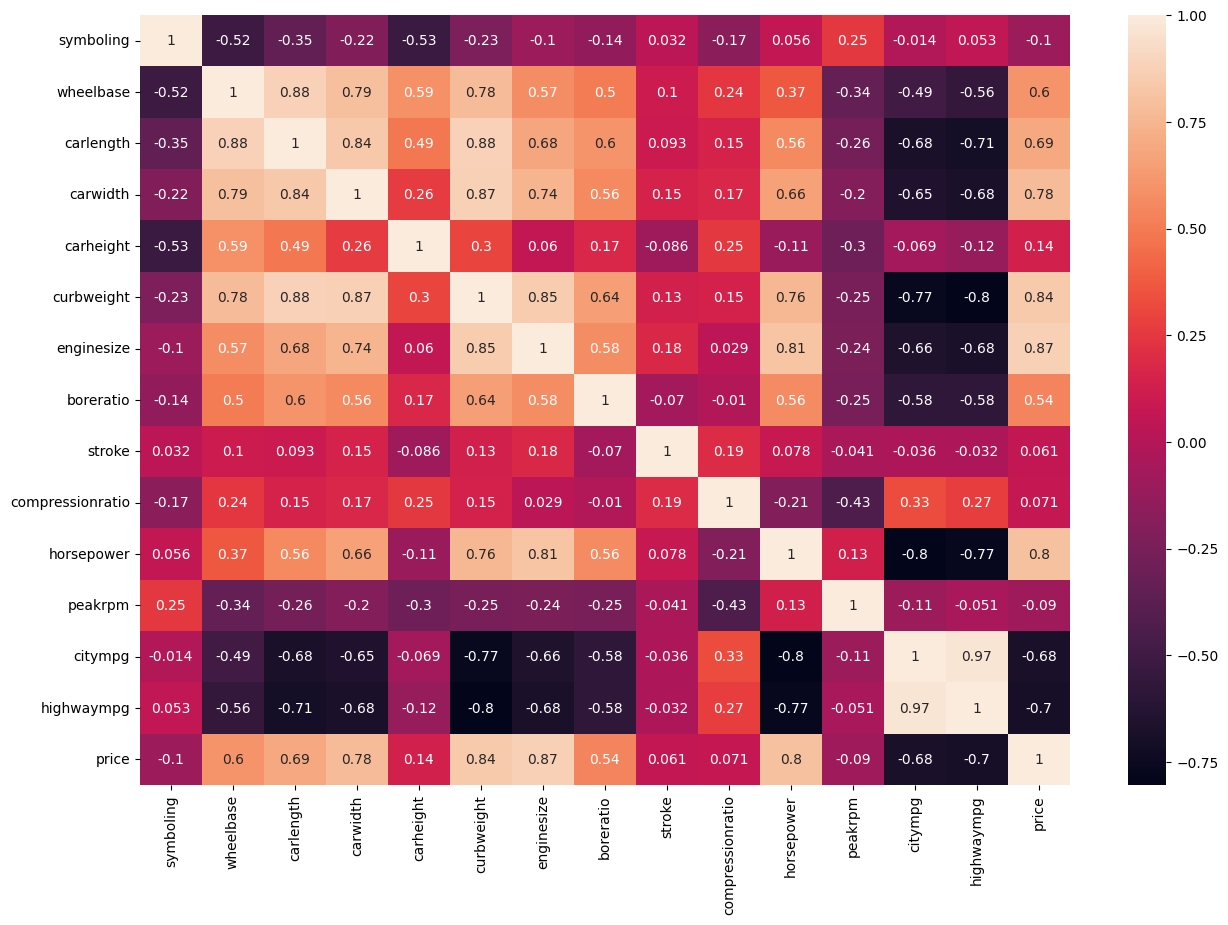

In [ ]:
import seaborn as sns
cars_data=cars_data.drop(columns=['CarName'])
plt.figure(figsize=(15,10))
sns.heatmap(cars_data.corr(numeric_only=True),annot=True)

In [ ]:
cars_data=cars_data.select_dtypes(include='number')
#dropping columns with low correlation with the target  Price
cars_data=cars_data.drop(columns=['symboling','stroke','carheight','compressionratio','peakrpm'])
print(cars_data.shape)

(196, 10)


<Axes: >

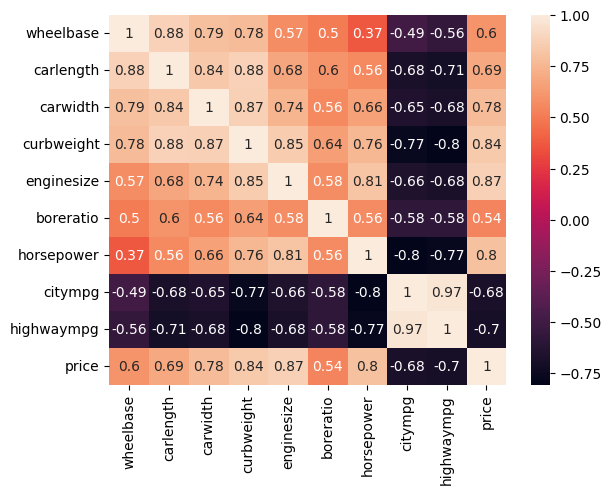

In [ ]:
sns.heatmap(cars_data.corr(),annot=True)

In [ ]:
# we will drop the independant features that are highly correlated between them.let's take a threshold of 0.82
# we drop the feature which is less correlated to the price variable
cars_data=cars_data.drop(columns=['wheelbase','citympg','carwidth','carlength','curbweight'])
# This technique is used to make sure the model doesn't take almost the same information from two different features
print("New datasetdimensions: ", cars_data.shape)
print('\n')
print('remaining columns: ', cars_data.columns)

New datasetdimensions:  (196, 5)


remaining columns:  Index(['enginesize', 'boreratio', 'horsepower', 'highwaympg', 'price'], dtype='object')


In [ ]:
cars_data.corr()

,enginesize,boreratio,horsepower,highwaympg,price
enginesize,1.000000,0.575384,0.809704,-0.683694,0.870485
boreratio,0.575384,1.000000,0.564734,-0.583083,0.538371
horsepower,0.809704,0.564734,1.000000,-0.771660,0.798213
highwaympg,-0.683694,-0.583083,-0.771660,1.000000,-0.697114
price,0.870485,0.538371,0.798213,-0.697114,1.000000


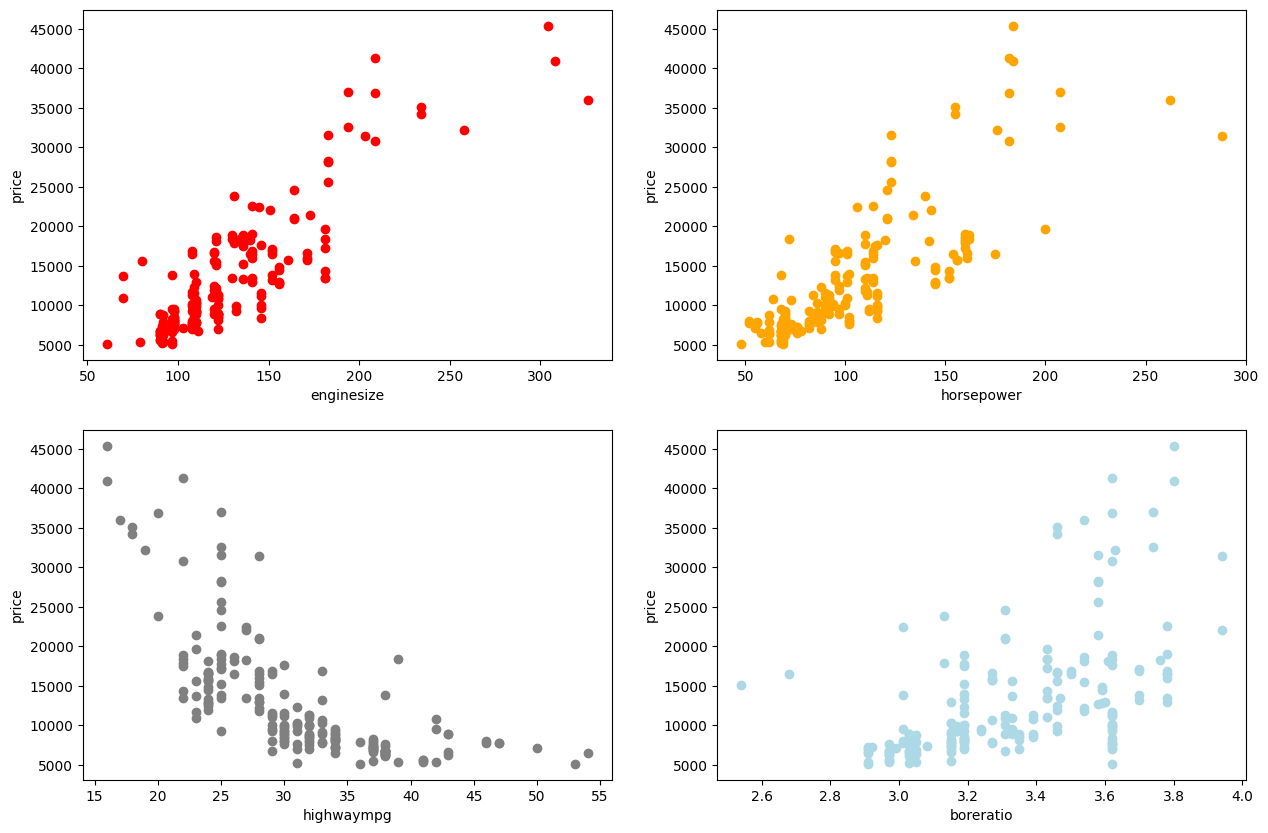

In [ ]:
plt.figure(figsize=(15,10))
#plt enginesize
plt.subplot(2,2,1)
plt.scatter(cars_data['enginesize'],cars_data['price'],color='red')
plt.xlabel('enginesize')
plt.ylabel('price')

#plt horsepower
plt.subplot(2,2,2)
plt.scatter(cars_data['horsepower'],cars_data['price'],color='orange')
plt.xlabel('horsepower')
plt.ylabel('price')

plt.subplot(2,2,3)
plt.scatter(cars_data['highwaympg'],cars_data['price'],color='grey')
plt.xlabel('highwaympg')
plt.ylabel('price')

plt.subplot(2,2,4)
plt.scatter(cars_data['boreratio'],cars_data['price'],color='lightblue')
plt.xlabel('boreratio')
plt.ylabel('price')

plt.show()

## MODEL INSTANCIATION

In [ ]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# import standardscaler
from sklearn.preprocessing import StandardScaler

In [ ]:
X=cars_data.drop(columns=['price'],axis=1).values
y=cars_data.price.values
print("X shape: ",X.shape)
print("y shape:", y.shape )

X shape:  (196, 4)
y shape: (196,)


### performances sans scaling

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
kf=KFold(n_splits=6,shuffle=True,random_state=12)
linreg=LinearRegression()
results=cross_val_score(linreg,X_train,y_train,cv=kf,scoring='r2')
predictions=linreg.fit(X_train,y_train).predict(X_test)
print(" cross validation: ",results)
print("confidence interval 95%: ", np.quantile(results,[0.025,0.975]))
print("r2 score: ",r2_score(y_test,predictions))
print("mse : ",mean_squared_error(y_test,predictions))

 cross validation:  [0.78035143 0.81874795 0.72307886 0.59569798 0.56499144 0.75658901]
confidence interval 95%:  [0.56882976 0.81394838]
r2 score:  0.8002010883587867
mse :  23858224.65293638


In [ ]:
np.sqrt(23858224)

np.float64(4884.488100098106)

### performances avec scaling

In [ ]:
# meme procédé avec le scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
lreg=LinearRegression()
results=cross_val_score(linreg,X_train_scaled,y_train,cv=kf,scoring='r2')
predictions=lreg.fit(X_train_scaled,y_train).predict(X_test_scaled)
print(" cross validation: ",results)
print("confidence interval 95%: ", np.quantile(results,[0.025,0.975]))
print("r2 score: ",r2_score(y_test,predictions))
print("mse : ",mean_squared_error(y_test,predictions))

 cross validation:  [0.78035143 0.81874795 0.72307886 0.59569798 0.56499144 0.75658901]
confidence interval 95%:  [0.56882976 0.81394838]
r2 score:  0.8002010883587866
mse :  23858224.6529364
